#               Spooky Author Identification - Kaggle

### Importing libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### A glance on the data & splitting it into train and validation sets

In [3]:
df = pd.read_csv('./Data/train.csv')

In [4]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [19]:
df.shape

(19579, 3)

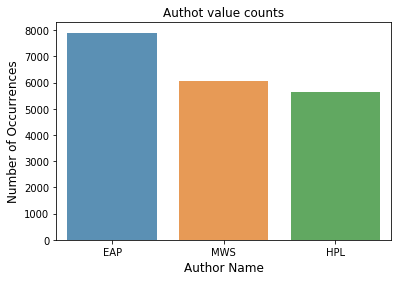

In [6]:
count_srs = df.author.value_counts()

sns.barplot(count_srs.index, count_srs.values, alpha=0.8)
plt.title('Authot value counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

A slight imbalanced dataset.

Next let's have a look at the wordclouds for all the authors.

Word Cloud for author EAP:


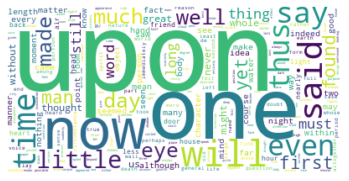

In [29]:
text_EAP = ''
for i in df[df['author']== 'EAP']['text']:
    i = str(i) 
    tokens = i.split()
    for words in tokens: 
        text_EAP = text_EAP + words + ' '
        
wc = WordCloud(background_color="white", max_words=len(text_EAP))
wc.generate(text_EAP)
print ("Word Cloud for author EAP:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for author EAP:


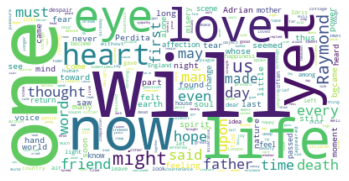

In [32]:
text_MWS = ''
for i in df[df['author']== 'MWS']['text']:
    i = str(i) 
    tokens = i.split()
    for words in tokens: 
        text_MWS = text_MWS + words + ' '
        
wc = WordCloud(background_color="white", max_words=len(text_MWS))
wc.generate(text_MWS)
print ("Word Cloud for author EAP:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for author HPL:


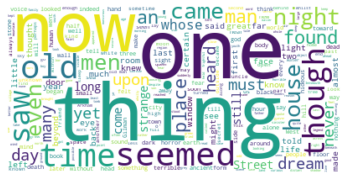

In [30]:
text_HPL = ''
for i in df[df['author']== 'HPL']['text']:
    i = str(i) 
    tokens = i.split()
    for words in tokens: 
        text_HPL = text_HPL + words + ' '
        
wc = WordCloud(background_color="white", max_words=len(text_HPL))
wc.generate(text_HPL)
print ("Word Cloud for author HPL:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Splitting the data into train and test

In [7]:
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(df.author.values)
x = df[['id','text']]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                      test_size = 0.2,
                                                      stratify = y,
                                                      random_state = 123)
x_train = x_train.drop(['id'], axis = 1)
x_test = x_test.drop(['id'], axis = 1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(15663, 1) (15663,) (3916, 1) (3916,)


### Basic Feature Engineering without pre-processing

Word count

In [9]:
x_train["num_words"] = x_train["text"].apply(lambda x: len(str(x).split()))

Unique word count

In [10]:
x_train["num_unique_words"] = x_train["text"].apply(lambda x: len(set(str(x).split())))

Character count

In [11]:
x_train["num_chars"] = x_train["text"].apply(lambda x: len(str(x)))

Stopword count

In [12]:
eng_stopwords = set(stopwords.words("english"))

x_train["num_stopwords"] = x_train["text"].apply(lambda x: len([word for word in str(x).lower().split() if word in eng_stopwords]))

Punctuation count

In [13]:
x_train["num_punctuations"] =x_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

Upper Case words

In [14]:
x_train["num_words_upper"] = x_train["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

Average word length

In [15]:
x_train["mean_word_len"] = x_train["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#### Analysing the above features

In [16]:
x_train.head()

,text,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,mean_word_len
1565,"But, Heaven bless me what is the matter?",8,8,40,4,2,0,4.125000
6518,"This was a matter for speculation, though one ...",42,37,245,19,2,0,4.857143
15404,"Shalmanezer, as we have it in holy writings, l...",16,15,89,7,4,0,4.625000
16622,"I once had a friend, the most noble of human c...",19,19,115,10,5,1,5.105263
14315,His brow was of the coldness of ice.,8,7,36,5,1,0,3.625000


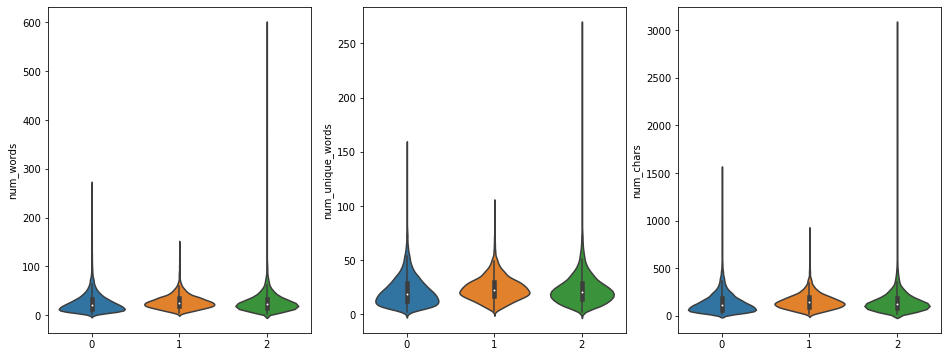

In [17]:
plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
sns.violinplot(x = y_train, y = x_train['num_words'], data = x_train)
plt.subplot(1,3,2)
sns.violinplot(x = y_train, y = x_train['num_unique_words'], data = x_train)
plt.subplot(1,3,3)
sns.violinplot(x = y_train, y = x_train['num_chars'], data = x_train)
plt.show()

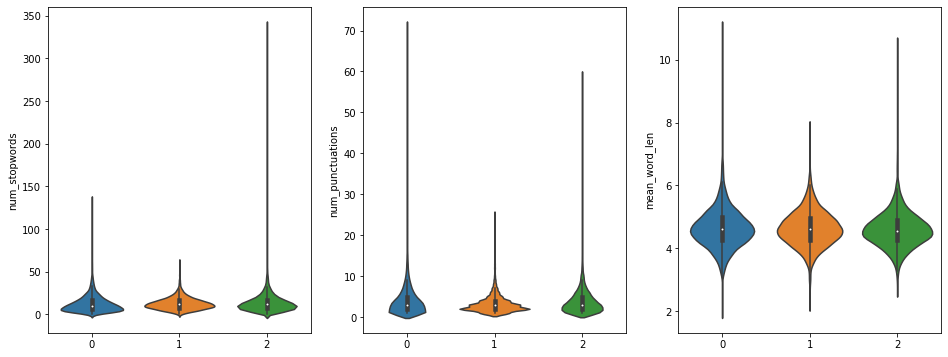

In [18]:
plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
sns.violinplot(x = y_train, y = x_train['num_stopwords'], data = x_train)
plt.subplot(1,3,2)
sns.violinplot(x = y_train, y = x_train['num_punctuations'], data = x_train)
plt.subplot(1,3,3)
sns.violinplot(x = y_train, y = x_train['mean_word_len'], data = x_train)
plt.show()

From the plots we can see that we do not a very good feature that can help us classify the texts.

### Text Based feature engineering

In [ ]:
# Fit transform the tfidf vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
train_tfidf = tfidf_vec.fit_transform(train_df['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())

In [33]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(train_df.author.values)

x_train, x_valid, y_train, y_valid = train_test_split(train_df['text'], y,
                                                      test_size=0.2,
                                                      stratify=y,
                                                      random_state=123)
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)